In [2]:
import os

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
# Converting from 95% to 5 sigma
sdss = np.array([22.0, 22.2, 22.2, 21.3, 20.5]) - 2.5*np.log10(2.5)

In [57]:
wavelength = [3.4, 4.6, 12, 22, 3.4, 4.6, 12, 22, 0.3551, 0.4686, 0.6165, 
              0.7481, 0.8931, 0.464, 0.658, 0.8931, 0.464, 0.658, 0.9, 1.25, 
              1.65, 2.17, 0.1528, 0.1528, 0.1528, 0.2271, 0.2271, 0.2271]

mag = [18.53, 17.63, 13.4, 10.6, 19.03, 18.13, 13.4, 10.6, 21.00514998,  
       21.20514998,  21.20514998,  20.30514998,  19.50514998, 26.5, 26, 
       24.7, 24.1, 23.5, 22.9, 15.8, 15.1, 14.3, 19.9, 22.6, 24.8, 20.8, 
       22.7, 24.4]

survey = ['WISE', 'WISE', 'WISE', 'WISE', 'UNWISE', 'UNWISE', 'UNWISE', 'UNWISE', 'SDSS', 'SDSS', 'SDSS', 'SDSS', 
          'SDSS', 'DES', 'DES', 'DES', 'LS', 'LS', 'LS', '2MASS', '2MASS', '2MASS', 'GALEXAIS', 
          'GALEXMIS', 'GALEXDIS', 'GALEXAIS', 'GALEXMIS', 'GALEXDIS']

band = ['W1', 'W2', 'W3', 'W4', 'W1', 'W2', 'W3', 'W4', 'u', 'g', 'r', 'i', 'z', 'g', 'r', 'z', 'g', 'r', 
        'z', 'J', 'H', 'Ks', 'FUV', 'FUV', 'FUV', 'NUV', 'NUV', 'NUV']

data = {'wavelength': wavelength, 'mag': mag, 'survey': survey, 'band': band}
df = pd.DataFrame(data=data)

In [58]:
area = np.pi*(2.5)**2
mulim = df.mag+2.5*np.log10(area)
df['mulim'] = mulim

In [59]:
wise = df[df.survey == 'WISE']
unwise = df[df.survey == 'UNWISE']
sdss = df[df.survey == 'SDSS']
des = df[df.survey == 'DES']
ls = df[df.survey == 'LS']
twomass = df[df.survey == '2MASS']
galexa = df[df.survey == 'GALEXAIS']
galexm = df[df.survey == 'GALEXMIS']
galexd = df[df.survey == 'GALEXDIS']

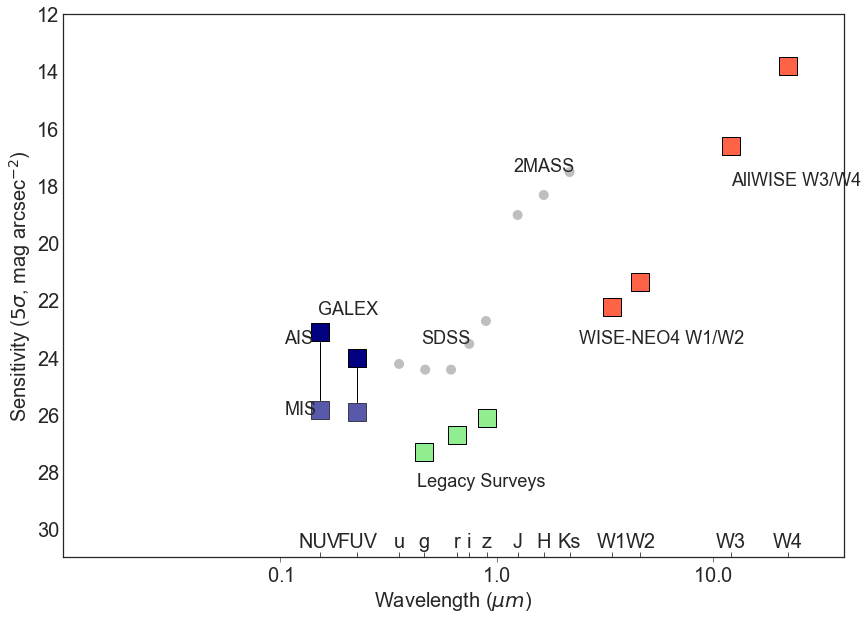

In [104]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(14,10))

# Plot unWISE
ax.scatter(unwise.wavelength, unwise.mulim, s=300, facecolors='tomato', 
           edgecolors='k', label='WISE (5-Year)', marker='s')

#ax.scatter(wise.wavelength[:2], wise.mulim[:2], s=300, facecolors='tomato', 
#           edgecolors='k', label='WISE (5-Year)', marker='s')

# Plot 2MASS
ax.scatter(twomass.wavelength, twomass.mulim, s=100, facecolors='gray', 
           edgecolors='none', alpha=0.5, label='2MASS', marker='o')

# Plot SDSS
ax.scatter(sdss.wavelength, sdss.mulim, s=100, facecolors='gray', 
           edgecolors='none', alpha=0.5,  label='SDSS', marker='o')

# Plot Legacy Surveys
ax.scatter(ls.wavelength, ls.mulim, s=300, facecolors='lightgreen', 
           edgecolors='k', label='Legacy Surveys', marker='s')

# Plot Galex
ax.scatter(galexa.wavelength, galexa.mulim, s=300, facecolors='navy', 
           edgecolors='k', label='GALEX-AIS', marker='s')
ax.scatter(galexm.wavelength, galexm.mulim, s=300, facecolors='navy', 
           edgecolors='k', label='GALEX-MIS', marker='s', alpha=0.65)

# Connect Galex points
ax.plot([galexa.wavelength.values[0], galexa.wavelength.values[0]], 
        [galexa.mulim.values[0]+0.35, galexm.mulim.values[0]-0.35], color='k', linestyle='-', linewidth=1)
ax.plot([galexa.wavelength.values[1], galexa.wavelength.values[1]], 
        [galexa.mulim.values[1]+0.35, galexm.mulim.values[1]-0.35], color='k', linestyle='-', linewidth=1)

ax.annotate('GALEX', xy=(0.15, 22.5), fontsize=18)
ax.annotate('Legacy Surveys', xy=(0.43, 28.5), fontsize=18)
ax.annotate('SDSS', xy=(0.45, 23.5), fontsize=18)
ax.annotate('2MASS', xy=(1.2, 17.5), fontsize=18)
ax.annotate('WISE-NEO4 W1/W2', xy=(2.4, 23.5), fontsize=18)
#ax.annotate('All WISE W1/W2', xy=(2.4, 20), fontsize=18)
ax.annotate('AllWISE W3/W4', xy=(12, 18), fontsize=18)
ax.annotate('AIS', xy=(0.105, 23.5), fontsize=18)
ax.annotate('MIS', xy=(0.105, 26), fontsize=18)



# Formatting
bands = ['NUV', 'FUV', 'u', 'g', 'r', 'i', 'z', 'J', 'H', 'Ks', 'W1', 'W2', 'W3', 'W4']
wavelength = [0.1528, 0.2271, 0.3551, 0.464, 0.658, 0.7481, 0.9, 1.25, 1.65, 2.17, 3.4, 4.6, 12, 22]


ax.set_xscale('log')
ax.set_xlim([0.0, 40])
ax.set_ylim([12, 31])
ax.invert_yaxis()
ax.set_xlabel(r'Wavelength ($\mu m$)', size=20)
ax.set_ylabel(r'Sensitivity ($5\sigma$, mag arcsec$^{-2}$)', size=20)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
plt.xticks(wavelength, bands)
ax.tick_params(axis="x",direction="in", pad=-25)
ax.tick_params(axis='x', which='major', direction='in', length=5)
ax.set_xticks([0.1, 1.0, 10.0], minor=True)
ax.set_yticks([30, 28, 26, 24, 22, 20, 18, 16, 14, 12])
ax.xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter(useMathText=True))
ax.tick_params(axis='x', which='minor', direction='out', length=5)

In [29]:
omega = np.array([4*np.pi*(180/np.pi)**2, 
                  14000, 
                  4*np.pi*(180/np.pi)**2, 
                  26300,
                  1000,
                  14055,
                  5000]) # 2mass, LS, WISE, GALEXAIS, GALEXMIS SDSS, DES
o2mass, ols, owise, ogalexa, ogalexm, osdss, odes = omega

In [30]:
muwise = df[np.logical_and(df.survey=='UNWISE', df.band=='W1')].mulim.values[0]
mu2mass = df[np.logical_and(df.survey=='2MASS', df.band=='Ks')].mulim.values[0]
muls = df[np.logical_and(df.survey=='LS', df.band=='r')].mulim.values[0]
mugalexa = df[np.logical_and(df.survey=='GALEXAIS', df.band=='NUV')].mulim.values[0]
mugalexm = df[np.logical_and(df.survey=='GALEXMIS', df.band=='NUV')].mulim.values[0]
musdss = df[np.logical_and(df.survey=='SDSS', df.band=='r')].mulim.values[0]
mudes = df[np.logical_and(df.survey=='DES', df.band=='r')].mulim.values[0]

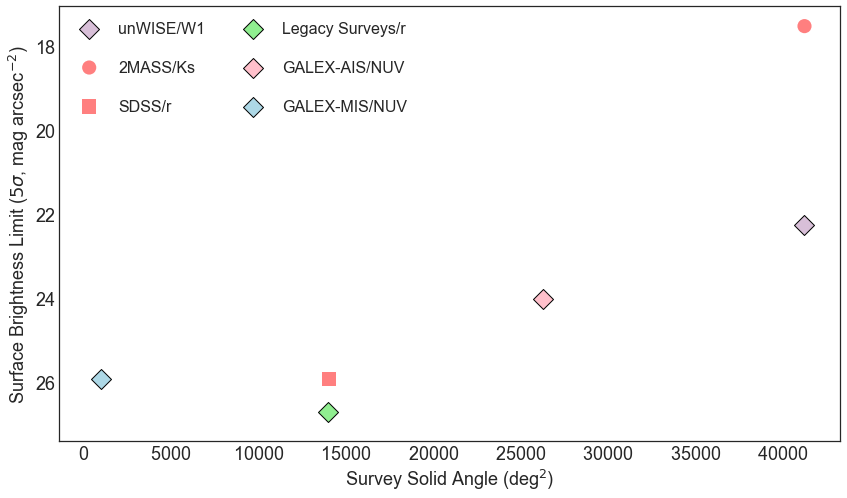

In [31]:
fig, ax = plt.subplots(figsize=(14,8))

plt.scatter(owise, muwise, s=200, label='unWISE/W1', 
            facecolors='thistle', edgecolors='k', marker='D')

plt.scatter(o2mass, mu2mass, color='red', s=200, facecolors='red', 
            edgecolors='none', alpha=0.5, label='2MASS/Ks', marker='o')

plt.scatter(osdss, musdss, color='pink', s=200, facecolors='red', 
            edgecolors='none', alpha=0.5,  label='SDSS/r', marker='s')

plt.scatter(ols, muls, s=200, facecolors='lightgreen', 
            edgecolors='k', label='Legacy Surveys/r', marker='D')

plt.scatter(ogalexa, mugalexa, color='orange', s=200, facecolors='pink', 
            edgecolors='k', label='GALEX-AIS/NUV', marker='D')

plt.scatter(ogalexm, mugalexm, s=200, facecolors='lightblue', 
            edgecolors='k', label='GALEX-MIS/NUV', marker='D')

#plt.scatter(odes, mudes, color='blue', s=200, label='DES')
plt.legend(frameon=False, labelspacing=1.5, ncol=2, fontsize=16)
plt.gca().invert_yaxis()
plt.xlabel(r'Survey Solid Angle (deg$^2$)', size=18)
plt.ylabel(r'Surface Brightness Limit ($5\sigma$, mag arcsec$^{-2}$)', size=18)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))

### Snippets

In [4]:
magvega = np.array([16.6, 15.6, 11.3, 8.0])
dm = np.array([2.699, 3.339, 5.174, 6.620])
fluxvega = 10**(22.5-magvega)
fluxab = fluxvega*10**(-dm/2.5)
magab = 22.5-np.log10(fluxab)